In [33]:
from pathlib import Path
import pandas as pd

processed = Path('../data/processed')
selection_data = pd.read_pickle(Path(processed) / 'selection_data.pkl')

In [34]:
selection_data = selection_data[selection_data.year >= 2018]

In [35]:
selection_data[['spot', 'home']].value_counts()

spot  home
1.0   1.0     347
      0.0     207
2.0   1.0     167
      0.0      63
3.0   1.0      56
      0.0      30
4.0   1.0       9
      0.0       6
5.0   0.0       1
dtype: int64

In [36]:
def adjust_plot(plt):
    plt.xaxis.grid(False)
    plt.yaxis.grid(True, linestyle='dashed', color='lightgrey')
    plt.set_axisbelow(True)
    plt.xaxis.set_ticks_position('none') 
    plt.yaxis.set_ticks_position('none') 

    plt.spines['right'].set_visible(False)
    plt.spines['top'].set_visible(False)

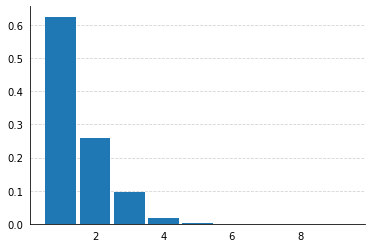

In [37]:
plot = selection_data['spot'].astype(float).hist(
    bins=9, range=(0.5,9.5), rwidth=0.9, density=True
)
adjust_plot(plot)


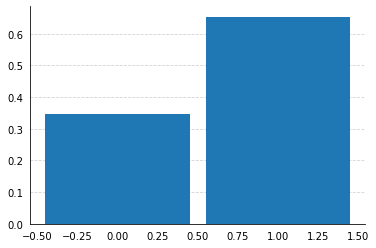

In [38]:
plot2 = selection_data['home'].astype(float).hist(density=True, bins=2, range=(-.5, 1.5), rwidth=0.9)
adjust_plot(plot2)

In [39]:
Wins = selection_data.loc[selection_data['Win'] == True, 'Win'].count()
Loses = selection_data.loc[selection_data['Win'] == False, 'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

79.9%


In [40]:
def streak_counter(df):
    df['L_Win'] = df['Win'].shift(1)
    df['start_of_streak'] = (df['Win'] != df['L_Win'])
    df['streak_id'] = df['start_of_streak'].cumsum()
    df['streak_counter'] = df.groupby('streak_id').cumcount() + 1
    df.loc[df.Win == 0, 'streak_counter'] = 0
    
    return df

In [41]:
selection_data = selection_data.astype({'Win':'int8'})
selection_data = streak_counter(selection_data)
streaks = selection_data.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

31

In [42]:
selection_data['EstProb'].describe()

count    886.000000
mean       0.760091
std        0.023478
min        0.700167
25%        0.743684
50%        0.755839
75%        0.773846
max        0.882463
Name: EstProb, dtype: float64

In [22]:
# Reduce noise by using rolling windows to calculate moving averages over seasons for park records, batting records, and pitching records.
# Improve to weighted averages

# Start including data from current season 

# Use score from sci kit learn to evaluate models better

# try tensor

# Lineup Fixed Effects

# Relief pitchers data